# ELS valuation

## - ELS 조건 -

### 1. 매 6개월 마다 두 종목의 조기상환평가가격이 모두 기준가격의 85%(6개월), 80%(12개월), 75%(18개월), 70%(24개월) 이상인 경우 연(12.5%)의 수익으로 자동 조기상환 결정

### 2. 조기상환이 연장될 경우 조기상환 조건 또한 낮아짐으로서 조기상환 가능성을 높이는 구조

### 3. 수익발생의 기회가 6개월 단위로 4회부여

### 4. 최대 25% 수익이 가능(만기까지 최대연장의 경우)

### 5. 만기 시점까지 한 종목이라도 일별 주가가(장중가 포함) 기준가격이 60% 미만으로 하락한 적이 있는 경우, 원금 손실 가능

## - 상품개요 -

### 대상종목 : 삼성전자, SK Hynix

### 만기 : 2년

### 수익률 : 연 12.5% / 6개월 단위 6.25%

### 기준가격검정일 : 2019. 11. 1

### 수익발생요건 : 매 6개월 마다 두 기초자산의 조기상환평가가격이 모두 기준가격의 85%(6개월), 80%(12개월), 75%(18개월), 70%(24개월) 이상인 경우

### 최대가능수익률 : 25% (만기까지 최대연장의 경우)

### 최대가능손실률 : 만기평가가격이 0인 기초자산이 있는 경우 원금 전액 손실가능

In [117]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("KRX_adj_except_div.csv",encoding="CP949",index_col="Unnamed: 0")

In [3]:
df = yf.download("005930.KS",
                 start = "2011-12-20",
                 end = "2021-12-20",
                 progress = False)

In [4]:
df2 = yf.download("000660.KS",
                 start = "2011-12-20",
                 end = "2021-12-20",
                 progress = False)

In [5]:
ddf = df.Close
ddf2 = df2.Close

In [6]:
dff = pd.concat([ddf, ddf2], axis=1)
dff.columns = ['Samsung','Hynix']

In [7]:
dff_before = dff.loc[:'2019-11-01']
dff_after = dff.loc['2019-11-01':]

In [8]:
df_samsung = dff_before['Samsung'].pct_change()
df_hynix = dff_before['Hynix'].pct_change()

In [9]:
ELS = pd.concat([df_samsung, df_hynix], axis = 1)
corr = ELS.corr().iloc[0,1]

In [10]:
sigma1 = df_samsung.std()
sigma2 = df_hynix.std()

In [11]:
# 삼성전자, 하이닉스의 과거 분산과 상관성이 미래에도 유지될거라고 가정하고 이전의 데이터로 표준편차와 상관관계를 구함
print(sigma1, sigma2, corr)

0.016421490005074646 0.02187218386305691 0.4175359393815786


<AxesSubplot:>

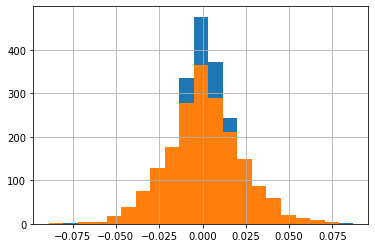

In [12]:
# 삼성전자의 일별 수익률 분포
(df_samsung).hist(bins=20)
# 하이닉스의 일별 수익률 분포
(df_hynix).hist(bins=20)

In [13]:
data

,000010,000020,000021,000030,000040,000041,000042,000050,000060,000070,...,950070,950100,950110,950130,950140,950160,950170,950180,950190,950200
20201224,NaN,20450.000000,NaN,NaN,1115.000000,NaN,NaN,12000.000000,16200.000000,74500.000000,...,NaN,NaN,8020.0,21450.0,4895.0,8010.0,5500.0,18650.0,27500.0,18200.0
20201223,NaN,20450.000000,NaN,NaN,1115.000000,NaN,NaN,12000.000000,16200.000000,74500.000000,...,NaN,NaN,8020.0,21450.0,4895.0,8010.0,5500.0,18650.0,27500.0,18200.0
20201222,NaN,23900.000000,NaN,NaN,1120.000000,NaN,NaN,11950.000000,15900.000000,72900.000000,...,NaN,NaN,8090.0,22900.0,4925.0,8010.0,5690.0,19500.0,27400.0,18200.0
20201221,NaN,23450.000000,NaN,NaN,1215.000000,NaN,NaN,12100.000000,16000.000000,75500.000000,...,NaN,NaN,8230.0,23950.0,5050.0,8010.0,5780.0,19200.0,28050.0,18050.0
20201218,NaN,20450.000000,NaN,NaN,1225.000000,NaN,NaN,12050.000000,16000.000000,69200.000000,...,NaN,NaN,8310.0,23500.0,5060.0,8010.0,5510.0,19050.0,27950.0,19750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950512,40437.636863,4092.465940,NaN,64905.579392,464078.487505,NaN,NaN,3611.993400,1690.570710,21917.741716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19950511,40733.418950,4092.465940,NaN,64905.579392,467846.377795,NaN,NaN,3618.694687,1700.068299,22283.037411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19950510,38958.726424,4166.874412,NaN,63272.734628,453402.798347,NaN,NaN,3618.694687,1728.561063,23086.687941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19950509,38874.217256,4315.691355,NaN,63680.945819,470986.286371,NaN,NaN,3618.694687,1757.053828,23086.687941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 몬테 카를로 시뮬레이션을 이용한 가상 데이터 생성

In [14]:
n_days = dff_after.shape[0]

In [15]:
div1 = 0 ## 배당률을 0으로 가정
div2 = 0
r= 0.05/365 ## 무위험 이자율
T = 1 #일간 변동성을 이용하여 데이터를 만드는 것이므로 T==1

In [16]:
simul_data1 = np.ones(n_days)
simul_data2 = np.ones(n_days)

In [17]:
x1 = np.random.normal(size = n_days)
x2 = np.random.normal(size=n_days)

In [18]:
e1 = x1.copy()
e2 = corr*x1+x2*np.sqrt(1-pow(corr,2))

In [19]:
simul_data1 = simul_data1/np.exp((div1-r-pow(sigma1,2)/2)*T + sigma1*e1*np.sqrt(T))
simul_data2 = simul_data2/np.exp((div1-r-pow(sigma2,2)/2)*T + sigma1*e2*np.sqrt(T))

In [20]:
simul_data1

array([1.00661941, 1.02176089, 0.99953167, 0.98288477, 1.01828836,
       1.00375117, 0.99504319, 1.00953107, 1.0181    , 1.00542373,
       0.97657342, 0.97573412, 0.98956727, 0.97729727, 1.00694047,
       1.02323636, 1.01067695, 0.99100941, 1.00281665, 1.02565733,
       1.02112882, 1.01357123, 1.02077201, 0.99481845, 1.02750763,
       1.00554305, 0.99599043, 1.01008625, 1.01670363, 0.99271582,
       0.9930171 , 0.97022745, 0.99274056, 0.98255807, 0.99686818,
       0.96598663, 1.00490209, 0.99297897, 1.01045317, 0.97082137,
       0.99941827, 0.97276791, 1.02188612, 1.00785732, 1.01002222,
       1.00398763, 0.9925314 , 0.99605445, 1.03469725, 0.98951104,
       0.98770848, 1.00813946, 1.00812173, 0.99152295, 1.01227917,
       0.98132887, 0.98903503, 0.9875562 , 0.99473147, 0.98253869,
       1.01168513, 0.98513772, 1.00086948, 1.02843886, 1.00501349,
       0.99832563, 0.98849163, 1.02531649, 1.00864145, 0.98140055,
       1.00315261, 1.02304378, 0.9944218 , 1.031912  , 0.98891

In [21]:
simul_data=pd.DataFrame(columns=dff_after.columns,index=dff_after.index)

In [22]:
simul_data

,Samsung,Hynix
Date,,
2019-11-01,NaN,NaN
2019-11-04,NaN,NaN
2019-11-05,NaN,NaN
2019-11-06,NaN,NaN
2019-11-07,NaN,NaN
...,...,...
2021-12-13,NaN,NaN
2021-12-14,NaN,NaN
2021-12-15,NaN,NaN


In [51]:
simul_data["Samsung"]=simul_data1
simul_data["Hynix"]=simul_data2

In [52]:
# simul_data.index = pd.to_datetime(simul_data.index, format = '%Y%m%d')

<AxesSubplot:xlabel='Date'>

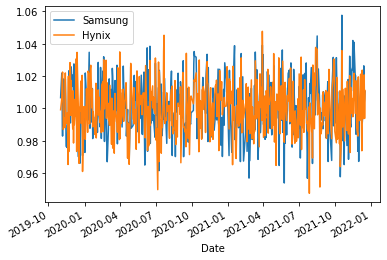

In [53]:
# 삼성전자와 하이닉스의 일별 예상 수익률 데이터를 plot한 것

simul_data.plot()

### 수익률 누적곱을 이용한 가상 주가 데이터 생성

<AxesSubplot:xlabel='Date'>

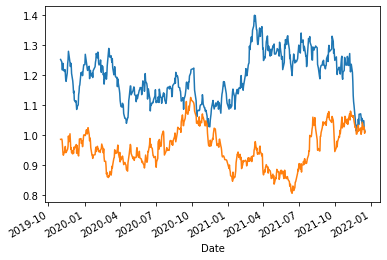

In [54]:
simul_data["Samsung"][::-1].cumprod().plot()
simul_data["Hynix"][::-1].cumprod().plot()

In [55]:
simul_data["Samsung"] = simul_data["Samsung"][::-1].cumprod()[::-1]
simul_data["Hynix"] = simul_data["Hynix"][::-1].cumprod()[::-1]

In [57]:
simul_data

,Samsung,Hynix
Date,,
2019-11-01,1.250965,0.984537
2019-11-04,1.242739,0.985377
2019-11-05,1.216271,0.979364
2019-11-06,1.216841,0.960448
2019-11-07,1.238030,0.939338
...,...,...
2021-12-13,1.047427,1.017678
2021-12-14,1.046363,1.024149
2021-12-15,1.019535,1.025555


### 케이스 별로 수익을 추정

In [101]:
case=0

time1=(simul_data.index[0]+datetime.timedelta(days=185)).strftime('%Y-%m-%d')
time2=(simul_data.index[0]+datetime.timedelta(days=364)).strftime('%Y-%m-%d')
time3=(simul_data.index[0]+datetime.timedelta(days=364+185)).strftime('%Y-%m-%d')
time4=(simul_data.index[0]+datetime.timedelta(days=364+364)).strftime('%Y-%m-%d')

In [110]:
profit=0
if simul_data["Samsung"].loc[time1]>0.85 and simul_data["Hynix"].loc[time1]>0.85:
    case=1
    profit=pow(1.125,0.5)/pow(1+r*365,0.5)
elif simul_data["Samsung"].loc[time2]>0.8 and simul_data["Hynix"].loc[time2]>0.80:
    case=2
    profit=pow(1.125,1)/pow(1+r*365,1)
elif simul_data["Samsung"].loc[time3]>0.75 and simul_data["Hynix"].loc[time3]>0.75:
    case=3
    profit=pow(1.125,1.5)/pow(1+r*365,1.5)
elif simul_data["Samsung"].loc[time4]>0.70 and simul_data["Hynix"].loc[time4]>0.70:
    case=4
    profit=pow(1.125,2)/pow(1+r*365,2)

In [111]:
### 60퍼 이상 하락한적이 없는경우
if simul_data[simul_data<0.6].dropna().shape[0]==0 and (simul_data["Samsung"].loc[time4]<0.70 or simul_data["Hynix"].loc[time4]<0.70 ):
    case=5
    profit=1/pow(1+r*365,2)
    
### 60퍼 이상 하락한적이 있는경우
if simul_data[simul_data<0.6].dropna().shape[0]!=0 and (simul_data["Samsung"].loc[time4]<0.70 or simul_data["Hynix"].loc[time4]<0.70 ):
    case=6
    profit=min(simul_data["Samsung"].loc[time4],simul_data["Hynix"].loc[time4])/pow(1+r*365,2)
    
print(case,profit)

1 1.035098339013531


### N개의 데이터를 생성

In [112]:
##몬테 카를로 시뮬레션을 이용한 가상 데이터 생성

n_days=dff_after.shape[0]      ### 만들 데이터 크기 정의
div1=0 ##배당률
div2=0
r=0.05/365 #무위험 이자율
T=1 #일간 변동성을 이용하여 데이터를 만드는 것이므로 T==1

#N개의 시뮬레이션 생성
N=100
simul_data1=np.ones((n_days,N))
simul_data2=np.ones((n_days,N))
x1=np.random.normal(size=(n_days,N))     ### 정규분포 (0,1) 생성
x2=np.random.normal(size=(n_days,N))

e1=x1
e2=corr*x1+x2*np.sqrt(1-pow(corr,2))  ###몬테카를로 변수
simul_data1=simul_data1/np.exp((div1-r-pow(sigma1,2)/2)*T+sigma1*e1*np.sqrt(T))
simul_data2=simul_data2/np.exp((div2-r-pow(sigma2,2)/2)*T+sigma2*e2*np.sqrt(T))

### N개의 데이터를 case별로 나누어 현가 계산

In [122]:
case_list=[]
profit_list=[]
for i in range(N):
    simul_data=pd.DataFrame(columns=dff_after.columns,index=dff_after.index)
    simul_data["Samsung"]=simul_data1[:,i]
    simul_data["Hynix"]=simul_data2[:,i]
    simul_data.index = pd.to_datetime(simul_data.index, format = '%Y%m%d')
    simul_data["Samsung"]=simul_data["Samsung"][::-1].cumprod()[::-1]
    simul_data["Hynix"]=simul_data["Hynix"][::-1].cumprod()[::-1]
    

    case=0

    time1=(simul_data.index[0]+datetime.timedelta(days=185)).strftime('%Y-%m-%d')
    time2=(simul_data.index[0]+datetime.timedelta(days=364)).strftime('%Y-%m-%d')
    time3=(simul_data.index[0]+datetime.timedelta(days=364+185)).strftime('%Y-%m-%d')
    time4=(simul_data.index[0]+datetime.timedelta(days=364+364)).strftime('%Y-%m-%d')
    profit=0
    if simul_data["Samsung"].loc[time1]>0.85 and simul_data["Hynix"].loc[time1]>0.85:
        case=1
        profit=pow(1.125,0.5)/pow(1+r*365,0.5)
    elif simul_data["Samsung"].loc[time2]>0.8 and simul_data["Hynix"].loc[time2]>0.80:
        case=2
        profit=pow(1.125,1)/pow(1+r*365,1)
    elif simul_data["Samsung"].loc[time3]>0.75 and simul_data["Hynix"].loc[time3]>0.75:
        case=3
        profit=pow(1.125,1.5)/pow(1+r*365,1.5)
    elif simul_data["Samsung"].loc[time4]>0.70 and simul_data["Hynix"].loc[time4]>0.70:
        case=4
        profit=pow(1.125,2)/pow(1+r*365,2)
    ### 60퍼 이상 하락한적이 없는경우
    if simul_data[simul_data<0.6].dropna().shape[0]==0 and (simul_data["Samsung"].loc[time4]<0.70 or simul_data["Hynix"].loc[time4]<0.70 ):
        case=5
        profit=1/pow(1+r*365,2)
    ### 60퍼 이상 하락한적이 있는경우
    if simul_data[simul_data<0.6].dropna().shape[0]!=0 and (simul_data["Samsung"].loc[time4]<0.70 or simul_data["Hynix"].loc[time4]<0.70 ):
        case=6
        profit=min(simul_data["Samsung"].loc[time4],simul_data["Hynix"].loc[time4])/pow(1+r*365,2)
    case_list.append(case)
    profit_list.append(profit)

In [133]:
sum(profit_list)/len(profit_list)

1.0626643484785103

profit_list의 평균이 현재 ELS의 가격<br>
profit_list의 평균이 1.063으로 미래가격을 1로 생각했을 때 6.3% 비쌈<br>
즉, 삼전이랑 하닉 묶은 ELS상품은 안사야함